In [120]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

import numpy as np
from sklearn.linear_model import LinearRegression

from scipy import signal
from scipy.signal import savgol_filter


## TopSoil

In [21]:
df = pd.read_csv (r'LUCAS_Topsoil_2015_20200323.csv')
print (df)

       Point_ID Revisited_point  Coarse  Clay  Sand  Silt  pH(CaCl2)  pH(H2O)  \
0      34103754              No     NaN   NaN   NaN   NaN        3.9     3.91   
1      34443774              No     NaN   NaN   NaN   NaN        3.1     3.91   
2      35163814              No     NaN   NaN   NaN   NaN        4.9     5.48   
3      32323656              No     NaN   NaN   NaN   NaN        3.0     3.76   
4      34463934              No    28.0  10.0  46.0  44.0        3.9     4.04   
...         ...             ...     ...   ...   ...   ...        ...      ...   
21854  45402772             Yes     NaN   NaN   NaN   NaN        6.9     7.03   
21855  47722672             Yes     NaN   NaN   NaN   NaN        5.7     5.98   
21856  45882618             Yes     NaN   NaN   NaN   NaN        6.8     6.99   
21857  45342706             Yes     NaN   NaN   NaN   NaN        6.0     6.12   
21858  47742660             Yes     NaN   NaN   NaN   NaN        4.2     4.68   

          EC     OC  ...  E

In [8]:
list(df.columns)

['Point_ID',
 'Revisited_point',
 'Coarse',
 'Clay',
 'Sand',
 'Silt',
 'pH(CaCl2)',
 'pH(H2O)',
 'EC',
 'OC',
 'CaCO3',
 'P',
 'N',
 'K',
 'Elevation',
 'LC1',
 'LU1',
 'Soil_Stones',
 'NUTS_0',
 'NUTS_1',
 'NUTS_2',
 'NUTS_3',
 'LC1_Desc',
 'LU1_Desc']

In [13]:
df.corr()
#Voor OC:
#OC - N    - EC   - P
#1  - 0.91 - 0.37 - 0.24

Point_ID    Coarse      Clay      Sand      Silt  pH(CaCl2)  \
Point_ID     1.000000 -0.247229 -0.010075 -0.039549  0.069144  -0.163294   
Coarse      -0.247229  1.000000  0.020987 -0.055709  0.067211   0.103743   
Clay        -0.010075  0.020987  1.000000 -0.789135  0.351458   0.564601   
Sand        -0.039549 -0.055709 -0.789135  1.000000 -0.851861  -0.359668   
Silt         0.069144  0.067211  0.351458 -0.851861  1.000000   0.067389   
pH(CaCl2)   -0.163294  0.103743  0.564601 -0.359668  0.067389   1.000000   
pH(H2O)     -0.170245  0.102403  0.562431 -0.331972  0.027000   0.988969   
EC          -0.092160  0.027431 -0.086244 -0.091682  0.213315   0.037117   
OC           0.081153  0.116495 -0.294735  0.116775  0.072935  -0.355304   
CaCO3       -0.237338  0.138949  0.385466 -0.197842 -0.027062   0.514421   
P            0.001639 -0.072721 -0.161841  0.109576 -0.029481  -0.112162   
N            0.050536  0.133731 -0.233193 -0.023481  0.234535  -0.278667   
K           -0.043450  0.020227  0.281231 -0.212525  0.083988   0.291199   
Elevation   -0.293536  0.258342 -0.028548 -0.029653  0.070192   0.096683   
Soil_Stones -0.175487  0.336909  0.050961  0.001842 -0.045467   0.062023   

              pH(H2O)        EC        OC     CaCO3         P         N  \
Point_ID    -0.170245 -0.092160  0.081153 -0.237338  0.001639  0.050536   
Coarse       0.102403  0.027431  0.116495  0.138949 -0.072721  0.133731   
Clay         0.562431 -0.086244 -0.294735  0.385466 -0.161841 -0.233193   
Sand        -0.331972 -0.091682  0.116775 -0.197842  0.109576 -0.023481   
Silt         0.027000  0.213315  0.072935 -0.027062 -0.029481  0.234535   
pH(CaCl2)    0.988969  0.037117 -0.355304  0.514421 -0.112162 -0.278667   
pH(H2O)      1.000000  0.001128 -0.328945  0.543443 -0.122150 -0.276620   
EC           0.001128  1.000000  0.366723  0.077438  0.249799  0.502906   
OC          -0.328945  0.366723  1.000000 -0.114602  0.242309  0.908556   
CaCO3        0.543443  0.077438 -0.114602  1.000000 -0.111456 -0.114324   
P           -0.122150  0.249799  0.242309 -0.111456  1.000000  0.259194   
N           -0.276620  0.502906  0.908556 -0.114324  0.259194  1.000000   
K            0.292024  0.177682  0.079637  0.154423  0.243031  0.109436   
Elevation    0.096244  0.000107 -0.017061  0.173270 -0.236548  0.013478   
Soil_Stones  0.072444 -0.036653 -0.016282  0.153395 -0.088889 -0.025288   

                    K  Elevation  Soil_Stones  
Point_ID    -0.043450  -0.293536    -0.175487  
Coarse       0.020227   0.258342     0.336909  
Clay         0.281231  -0.028548     0.050961  
Sand        -0.212525  -0.029653     0.001842  
Silt         0.083988   0.070192    -0.045467  
pH(CaCl2)    0.291199   0.096683     0.062023  
pH(H2O)      0.292024   0.096244     0.072444  
EC           0.177682   0.000107    -0.036653  
OC           0.079637  -0.017061    -0.016282  
CaCO3        0.154423   0.173270     0.153395  
P            0.243031  -0.236548    -0.088889  
N            0.109436   0.013478    -0.025288  
K            1.000000   0.032656     0.037021  
Elevation    0.032656   1.000000     0.256894  
Soil_Stones  0.037021   0.256894     1.000000

In [16]:
df[['OC', 'N', 'EC', 'P']]

OC     N     EC      P
0       25.5   2.8  44.20   42.9
1      503.5  19.9  46.40  164.9
2       51.4   4.3  15.85   26.9
3      470.3  16.1  26.90  102.8
4       43.1   2.3  28.40    6.3
...      ...   ...    ...    ...
21854   49.9   5.6  81.00   49.3
21855   19.4   2.4  22.30   58.0
21856   53.9   5.9  65.10   16.6
21857   24.2   3.2  30.70    4.6
21858   26.0   2.2   7.30    9.6

[21859 rows x 4 columns]

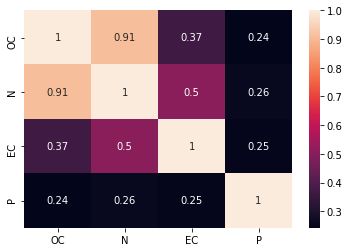

In [17]:
corrMatrix = df[['OC', 'N', 'EC', 'P']].corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [23]:
BetterData = df[['OC', 'N', 'EC', 'P']]
BetterData

OC     N     EC      P
0       25.5   2.8  44.20   42.9
1      503.5  19.9  46.40  164.9
2       51.4   4.3  15.85   26.9
3      470.3  16.1  26.90  102.8
4       43.1   2.3  28.40    6.3
...      ...   ...    ...    ...
21854   49.9   5.6  81.00   49.3
21855   19.4   2.4  22.30   58.0
21856   53.9   5.9  65.10   16.6
21857   24.2   3.2  30.70    4.6
21858   26.0   2.2   7.30    9.6

[21859 rows x 4 columns]

In [30]:
X = BetterData[['N', 'EC', 'P']]
y = BetterData["OC"]

In [29]:
BetterData.isnull().values.any() #geen nul waardes

False

In [32]:
reg = LinearRegression().fit(X, y)

In [33]:
reg.score(X, y)

0.8368573773749126

## All Country Soil

In [39]:
oneCountryDf = pd.read_csv (r'LUCAS2015_Soil_Spectra_EU28\spectra_ AT .csv')

In [41]:
list(oneCountryDf.columns)

['source',
 'SampleID',
 'PointID',
 'NUTS_0',
 'SampleN',
 '400',
 '400.5',
 '401',
 '401.5',
 '402',
 '402.5',
 '403',
 '403.5',
 '404',
 '404.5',
 '405',
 '405.5',
 '406',
 '406.5',
 '407',
 '407.5',
 '408',
 '408.5',
 '409',
 '409.5',
 '410',
 '410.5',
 '411',
 '411.5',
 '412',
 '412.5',
 '413',
 '413.5',
 '414',
 '414.5',
 '415',
 '415.5',
 '416',
 '416.5',
 '417',
 '417.5',
 '418',
 '418.5',
 '419',
 '419.5',
 '420',
 '420.5',
 '421',
 '421.5',
 '422',
 '422.5',
 '423',
 '423.5',
 '424',
 '424.5',
 '425',
 '425.5',
 '426',
 '426.5',
 '427',
 '427.5',
 '428',
 '428.5',
 '429',
 '429.5',
 '430',
 '430.5',
 '431',
 '431.5',
 '432',
 '432.5',
 '433',
 '433.5',
 '434',
 '434.5',
 '435',
 '435.5',
 '436',
 '436.5',
 '437',
 '437.5',
 '438',
 '438.5',
 '439',
 '439.5',
 '440',
 '440.5',
 '441',
 '441.5',
 '442',
 '442.5',
 '443',
 '443.5',
 '444',
 '444.5',
 '445',
 '445.5',
 '446',
 '446.5',
 '447',
 '447.5',
 '448',
 '448.5',
 '449',
 '449.5',
 '450',
 '450.5',
 '451',
 '451.5',
 '452

In [72]:
correctColumnNames = list(oneCountryDf.columns)

for col in oneCountryDf.columns:
    try:
        if float(col) < 500 or float(col) > 2450 or float(col) % 10 != 0:
            correctColumnNames.remove(col)
    except ValueError:
        correctColumnNames.remove(col)
        continue
        
correctColumnNames


['500',
 '510',
 '520',
 '530',
 '540',
 '550',
 '560',
 '570',
 '580',
 '590',
 '600',
 '610',
 '620',
 '630',
 '640',
 '650',
 '660',
 '670',
 '680',
 '690',
 '700',
 '710',
 '720',
 '730',
 '740',
 '750',
 '760',
 '770',
 '780',
 '790',
 '800',
 '810',
 '820',
 '830',
 '840',
 '850',
 '860',
 '870',
 '880',
 '890',
 '900',
 '910',
 '920',
 '930',
 '940',
 '950',
 '960',
 '970',
 '980',
 '990',
 '1000',
 '1010',
 '1020',
 '1030',
 '1040',
 '1050',
 '1060',
 '1070',
 '1080',
 '1090',
 '1100',
 '1110',
 '1120',
 '1130',
 '1140',
 '1150',
 '1160',
 '1170',
 '1180',
 '1190',
 '1200',
 '1210',
 '1220',
 '1230',
 '1240',
 '1250',
 '1260',
 '1270',
 '1280',
 '1290',
 '1300',
 '1310',
 '1320',
 '1330',
 '1340',
 '1350',
 '1360',
 '1370',
 '1380',
 '1390',
 '1400',
 '1410',
 '1420',
 '1430',
 '1440',
 '1450',
 '1460',
 '1470',
 '1480',
 '1490',
 '1500',
 '1510',
 '1520',
 '1530',
 '1540',
 '1550',
 '1560',
 '1570',
 '1580',
 '1590',
 '1600',
 '1610',
 '1620',
 '1630',
 '1640',
 '1650',
 '1660

In [108]:
TrimmedData = oneCountryDf[correctColumnNames]
x = [int(i) for i in correctColumnNames]
y = [i for i in TrimmedData.iloc[0]]
TrimmedData


500       510       520       530       540       550       560  \
0     0.935945  0.917636  0.898664  0.880069  0.862695  0.846799  0.832794   
1     0.933601  0.915229  0.896166  0.877465  0.859999  0.844051  0.830008   
2     0.942289  0.929267  0.915554  0.901758  0.888446  0.875666  0.863565   
3     0.941613  0.928548  0.914764  0.900899  0.887538  0.874724  0.862608   
4     1.062236  1.048689  1.032839  1.015300  0.996920  0.977556  0.956967   
...        ...       ...       ...       ...       ...       ...       ...   
1057  0.804281  0.776926  0.747755  0.718261  0.690275  0.665054  0.643124   
1058  0.751520  0.729325  0.705610  0.681648  0.658641  0.637602  0.619191   
1059  0.751228  0.729063  0.705345  0.681374  0.658367  0.637336  0.618923   
1060  0.824119  0.798944  0.772438  0.746010  0.720927  0.698448  0.679406   
1061  0.824943  0.799697  0.773174  0.746668  0.721526  0.699023  0.679935   

           570       580       590  ...      2360      2370      2380  \
0     0.821060  0.811319  0.803298  ...  0.670362  0.668568  0.667902   
1     0.818257  0.808506  0.800447  ...  0.667446  0.665679  0.664977   
2     0.852506  0.842175  0.832820  ...  0.588998  0.586717  0.585471   
3     0.851507  0.841149  0.831756  ...  0.587294  0.585102  0.583821   
4     0.935441  0.914297  0.895706  ...  0.651385  0.650776  0.650855   
...        ...       ...       ...  ...       ...       ...       ...   
1057  0.625109  0.610997  0.600281  ...  0.445637  0.445502  0.447039   
1058  0.603771  0.590870  0.580107  ...  0.441553  0.440526  0.440293   
1059  0.603487  0.590561  0.579790  ...  0.441367  0.440326  0.440086   
1060  0.664231  0.652530  0.643662  ...  0.579588  0.578593  0.578224   
1061  0.664738  0.652996  0.644101  ...  0.580454  0.579372  0.579067   

          2390      2400      2410      2420      2430      2440      2450  
0     0.668283  0.668310  0.668829  0.670065  0.671825  0.673729  0.675456  
1     0.665306  0.665367  0.665803  0.667077  0.668875  0.670622  0.672511  
2     0.584912  0.584738  0.586341  0.589545  0.593506  0.596985  0.599313  
3     0.583277  0.583078  0.584540  0.587845  0.591780  0.595296  0.597604  
4     0.650921  0.650731  0.651707  0.653758  0.656133  0.658063  0.659147  
...        ...       ...       ...       ...       ...       ...       ...  
1057  0.448403  0.449116  0.451578  0.455795  0.460842  0.465642  0.468971  
1058  0.440523  0.441110  0.443023  0.446034  0.449248  0.451747  0.453333  
1059  0.440351  0.440972  0.442941  0.445894  0.449157  0.451674  0.453265  
1060  0.578494  0.578777  0.579648  0.581179  0.582924  0.584498  0.585899  
1061  0.579309  0.579630  0.580461  0.582007  0.583739  0.585269  0.586639  

[1062 rows x 196 columns]

In [ ]:
# np.array([[ (Sxx[i][j] - np.mean(Sxx[i]) ) / np.std(Sxx[i]) for j in range(Sxx.shape[1])] for i in range(Sxx.shape[0])])

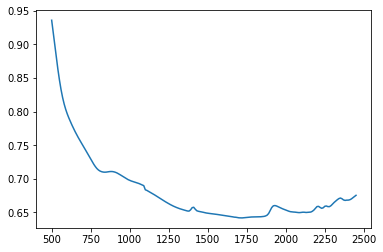

In [109]:
plt.plot(x, y)
plt.show()

y: [0.935945, 0.917636, 0.898664, 0.880069, 0.862695, 0.846799, 0.832794, 0.82106, 0.811319, 0.803298, 0.796523, 0.790578, 0.785119, 0.779974, 0.775051, 0.770313, 0.765842, 0.761583, 0.757468, 0.753536, 0.749624, 0.745649, 0.741639, 0.737564, 0.733496, 0.729381, 0.725327, 0.721583, 0.718157, 0.71524, 0.713072, 0.711559, 0.710606, 0.710062, 0.709862, 0.710003, 0.71038, 0.710726, 0.710881, 0.710778, 0.710326, 0.709576, 0.708558, 0.707309, 0.70588, 0.704427, 0.702948, 0.701419, 0.699994, 0.698758, 0.6977, 0.69676, 0.695954, 0.695209, 0.694477, 0.693726, 0.692932, 0.691951, 0.690914, 0.689822, 0.683684, 0.682747, 0.681339, 0.680044, 0.678712, 0.677394, 0.676006, 0.674511, 0.672952, 0.671426, 0.669946, 0.668522, 0.667113, 0.665709, 0.664348, 0.663003, 0.661723, 0.660516, 0.659353, 0.658309, 0.657336, 0.656416, 0.655576, 0.654807, 0.654089, 0.65344, 0.652793, 0.652133, 0.651953, 0.653842, 0.657083, 0.657663, 0.654764, 0.652484, 0.651699, 0.65126, 0.650779, 0.650263, 0.649714, 0.649184, 0.648

<ipython-input-118-049598c376d9>:4: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=196).
  plt.specgram(y)


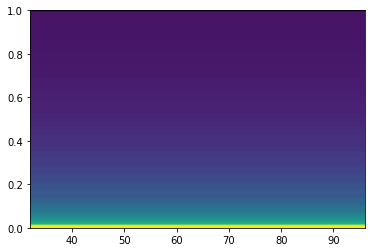

In [118]:


print("y:", y)
print(type(y[0]))
print("x:", x)
plt.specgram(y)
plt.show()   

[1.5        1.51496716 1.52845085 ... 1.4462365  1.46562933 1.48355252]


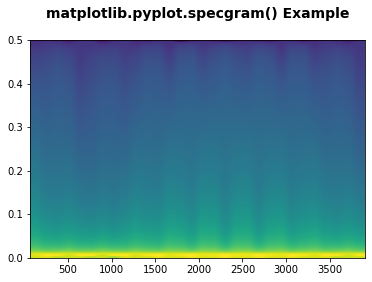

In [107]:
import matplotlib.pyplot as plt 
import numpy as np 
  
    
dt = 0.005
t = np.arange(0.0, 20.0, dt) 
x = np.sin(np.pi * t) + 1.5 * np.cos(np.pi * 2*t) 

print(x)

plt.specgram(x, Fs = 1)
plt.title('matplotlib.pyplot.specgram() Example\n', 
          fontsize = 14, fontweight ='bold')
  
plt.show()   

       source SampleID   PointID NUTS_0  SampleN       400     400.5  \
0  LU_172.txt  11004_1  46442722     AT    11004  0.901924  0.907745   
1  LU_172.txt  11004_2  46442722     AT    11004  0.898363  0.904257   
2  LU_172.txt  11005_1  46522722     AT    11005  0.870422  0.876326   
3  LU_172.txt  11005_2  46522722     AT    11005  0.869277  0.875201   
4  LU_172.txt  11008_1  46882726     AT    11008  0.937757  0.944273   

        401     401.5       402  ...      2495    2495.5      2496    2496.5  \
0  0.913509  0.919191  0.924762  ...  0.681043  0.681045  0.681039  0.681024   
1  0.910094  0.915846  0.921486  ...  0.677953  0.677963  0.677970  0.677974   
2  0.882174  0.887940  0.893597  ...  0.604513  0.604487  0.604457  0.604425   
3  0.881073  0.886863  0.892548  ...  0.602784  0.602782  0.602775  0.602761   
4  0.950737  0.957122  0.963402  ...  0.660734  0.660686  0.660632  0.660573   

       2497    2497.5      2498    2498.5      2499    2499.5  
0  0.681001  0.680971 

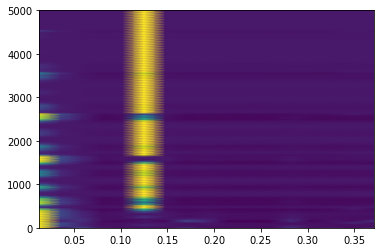

x ['LU_172.txt' '11005_1' 46522722 ... 0.604284 0.604248 0.604204]


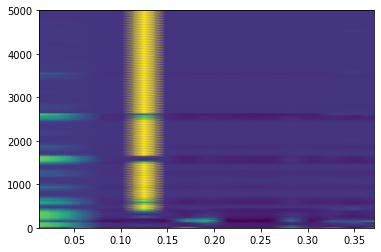

x ['LU_172.txt' '11005_2' 46522722 ... 0.602634 0.602588 0.602525]


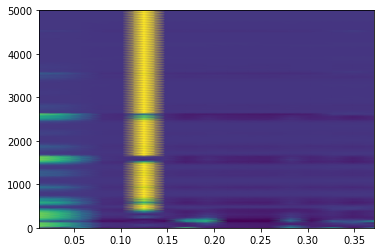

x ['LU_172.txt' '11008_1' 46882726 ... 0.660294 0.660218 0.660117]


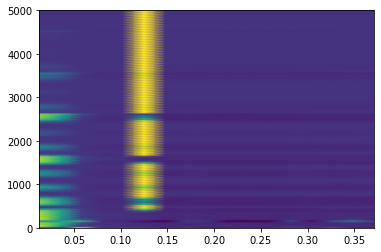

x ['LU_172.txt' '11008_2' 46882726 ... 0.659708 0.659644 0.659559]


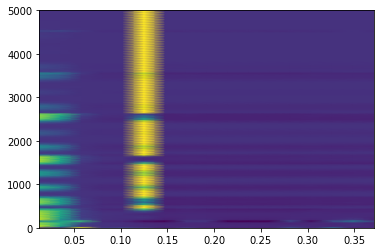

x ['LU_172.txt' '11028_1' 47122726 ... 0.6183 0.618338 0.618384]


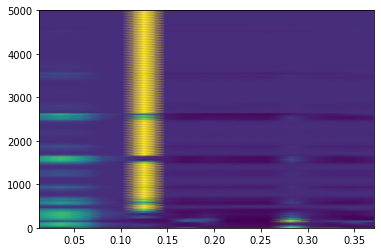

x ['LU_172.txt' '11028_2' 47122726 ... 0.616498 0.616531 0.61657]


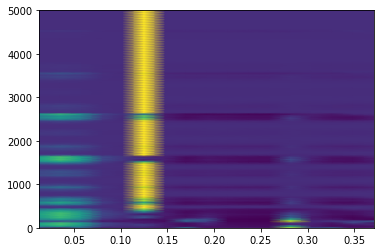

x ['LU_172.txt' '11035_1' 46422682 ... 0.577384 0.577365 0.577338]


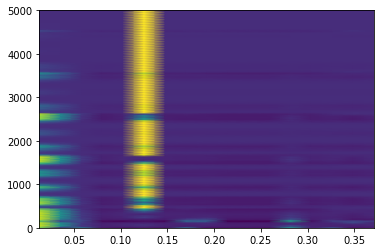

x ['LU_172.txt' '11035_2' 46422682 ... 0.574746 0.574763 0.574784]


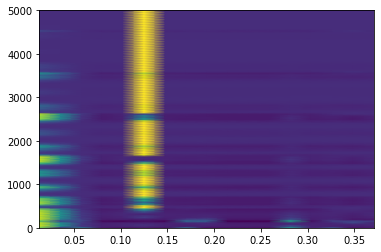

x ['LU_172.txt' '11048_1' 46842682 ... 0.51181 0.511814 0.511817]


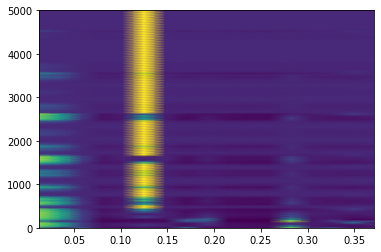

x ['LU_172.txt' '11048_2' 46842682 ... 0.510509 0.510519 0.51053]


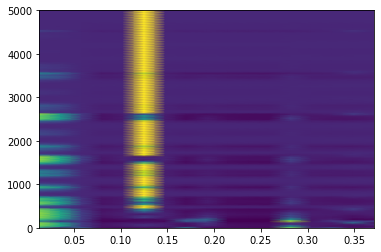

x ['LU_172.txt' '11049_1' 46862684 ... 0.611395 0.611416 0.61144]


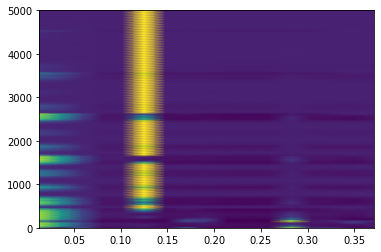

x ['LU_172.txt' '11049_2' 46862684 ... 0.607979 0.608018 0.608071]


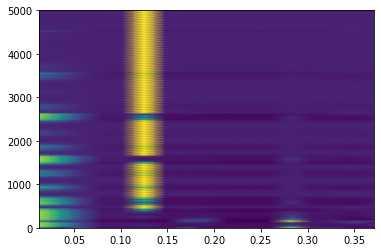

x ['LU_172.txt' '11060_1' 45482622 ... 0.527364 0.527403 0.527455]


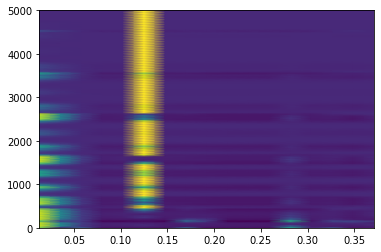

x ['LU_172.txt' '11060_2' 45482622 ... 0.525503 0.525511 0.525519]


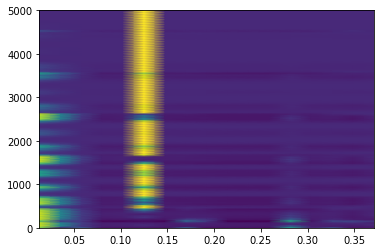

x ['LU_172.txt' '11071_1' 46882710 ... 0.745611 0.745542 0.745447]


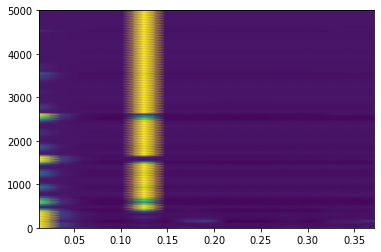

x ['LU_172.txt' '11071_2' 46882710 ... 0.74308 0.743035 0.742975]


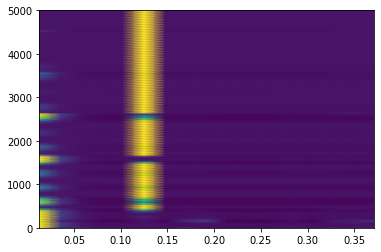

x ['LU_172.txt' '11079_1' 44382686 ... 0.638323 0.638328 0.638328]


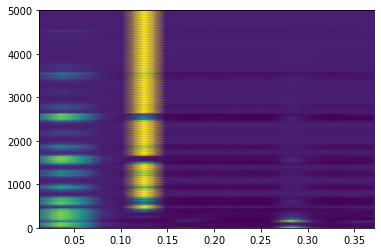

x ['LU_172.txt' '11079_2' 44382686 ... 0.635924 0.635944 0.635967]


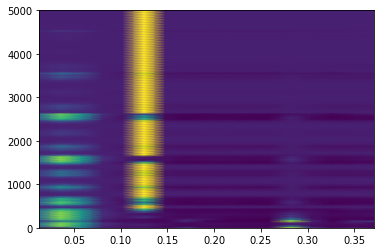

x ['LU_172.txt' '11103_1' 42942676 ... 0.557202 0.557299 0.557423]


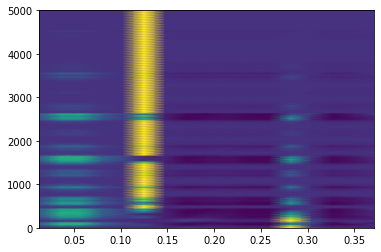

x ['LU_172.txt' '11103_2' 42942676 ... 0.557136 0.557232 0.557358]


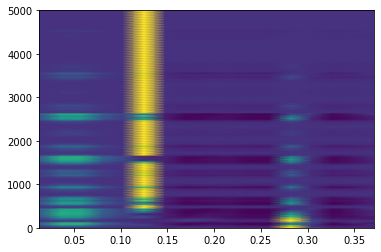

x ['LU_172.txt' '11121_1' 44302682 ... 0.54198 0.541956 0.541922]


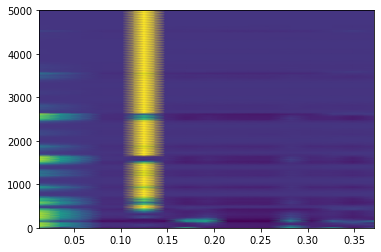

x ['LU_172.txt' '11121_2' 44302682 ... 0.538988 0.538985 0.538983]


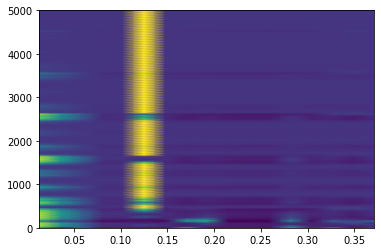

x ['LU_172.txt' '11125_1' 44542698 ... 0.522115 0.522088 0.52205]


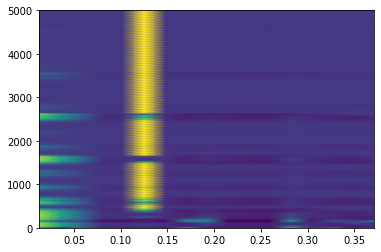

x ['LU_172.txt' '11125_2' 44542698 ... 0.521386 0.521381 0.521373]


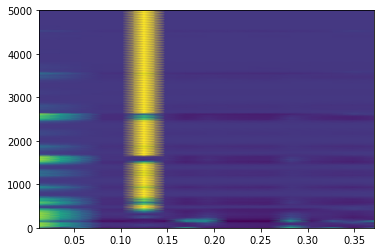

x ['LU_172.txt' '11126_1' 45642724 ... 0.37374 0.373815 0.373911]


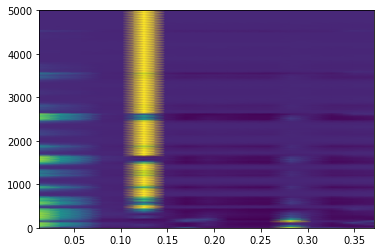

x ['LU_172.txt' '11126_2' 45642724 ... 0.374916 0.374988 0.375079]


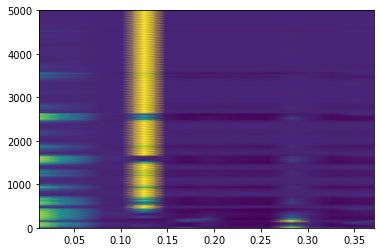

x ['LU_172.txt' '11127_1' 45622768 ... 0.603807 0.603898 0.604015]


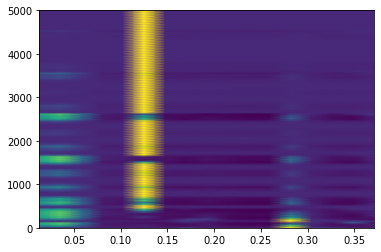

x ['LU_172.txt' '11127_2' 45622768 ... 0.595026 0.595118 0.595235]


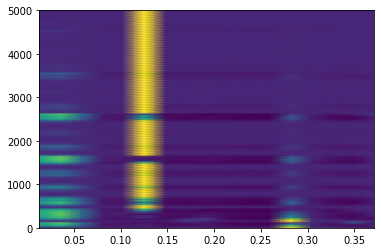

x ['LU_172.txt' '11128_1' 45482768 ... 0.448852 0.4489 0.448959]


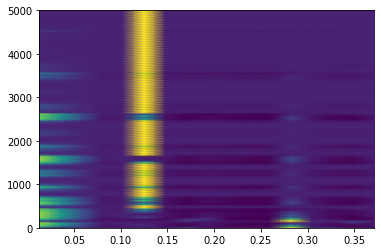

x ['LU_172.txt' '11128_2' 45482768 ... 0.446151 0.446204 0.446272]


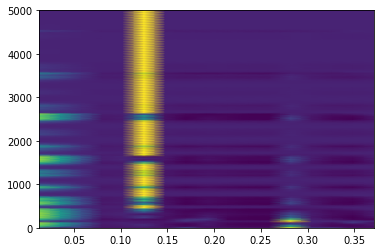

x ['LU_172.txt' '11129_1' 45542782 ... 0.522032 0.522041 0.522051]


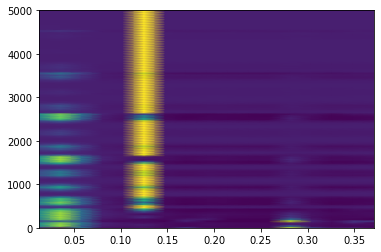

x ['LU_172.txt' '11129_2' 45542782 ... 0.518567 0.51858 0.518594]


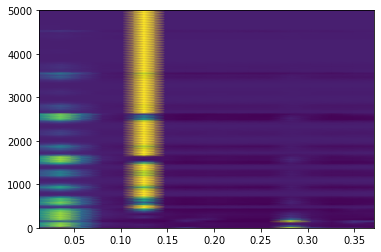

x ['LU_172.txt' '11141_1' 46102726 ... 0.581277 0.581378 0.581506]


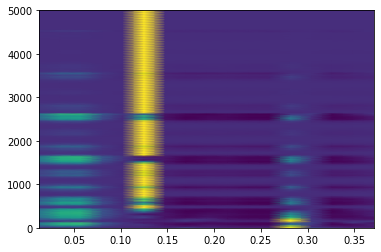

x ['LU_172.txt' '11141_2' 46102726 ... 0.575563 0.575646 0.575752]


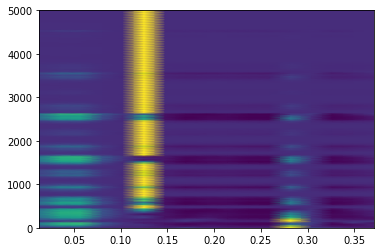

x ['LU_172.txt' '11142_1' 46182722 ... 0.444618 0.444673 0.444738]


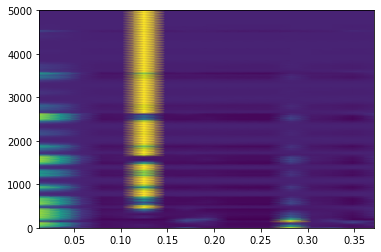

x ['LU_172.txt' '11142_2' 46182722 ... 0.442781 0.442849 0.442939]


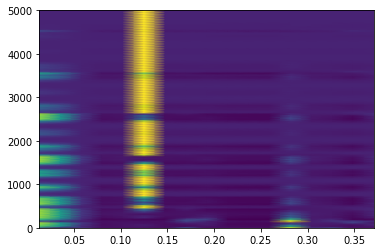

x ['LU_172.txt' '11146_1' 45882646 ... 0.538424 0.53842 0.538412]


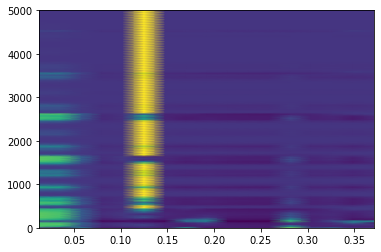

x ['LU_172.txt' '11146_2' 45882646 ... 0.537713 0.537686 0.53765]


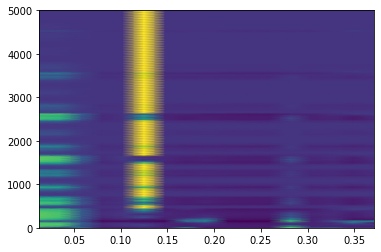

x ['LU_172.txt' '11150_1' 46782766 ... 0.615769 0.615875 0.61601]


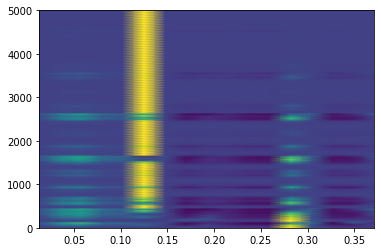

x ['LU_172.txt' '11150_2' 46782766 ... 0.60977 0.609853 0.60996]


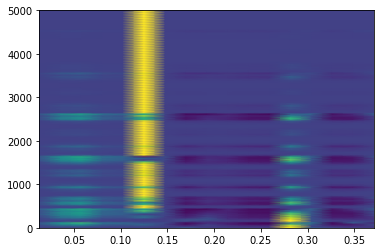

x ['LU_172.txt' '11155_1' 46942878 ... 0.551626 0.551645 0.551671]


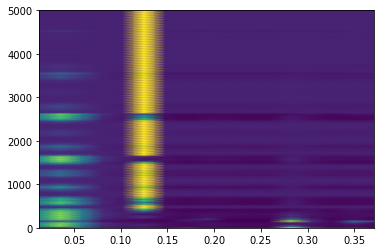

x ['LU_172.txt' '11155_2' 46942878 ... 0.549269 0.54927 0.54927]


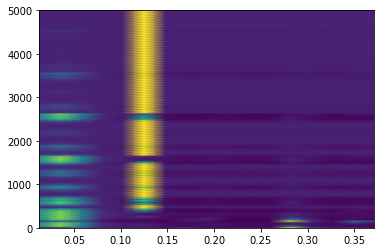

x ['LU_172.txt' '11156_1' 47022884 ... 0.469988 0.47001 0.470034]


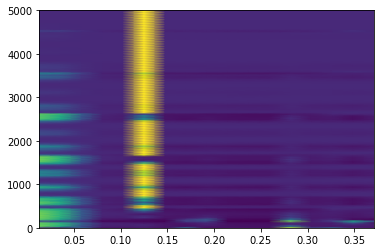

x ['LU_172.txt' '11156_2' 47022884 ... 0.468044 0.468076 0.468116]


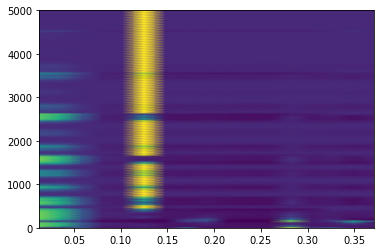

x ['LU_172.txt' '11157_1' 47042874 ... 0.447053 0.447102 0.447162]


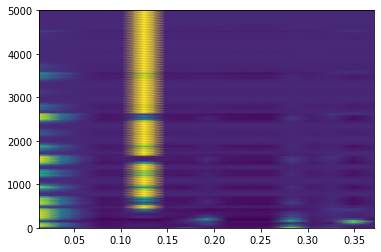

x ['LU_172.txt' '11157_2' 47042874 ... 0.444665 0.444716 0.44478]


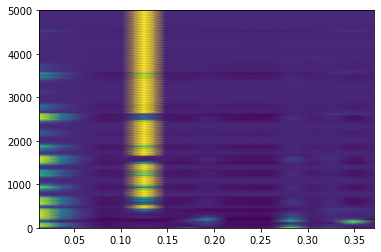

x ['LU_172.txt' '11175_1' 45462768 ... 0.488212 0.488234 0.48826]


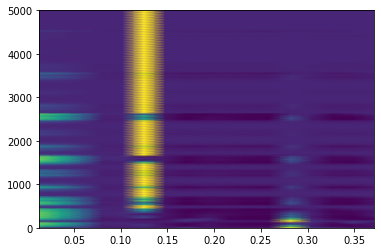

x ['LU_172.txt' '11175_2' 45462768 ... 0.482969 0.483003 0.483044]


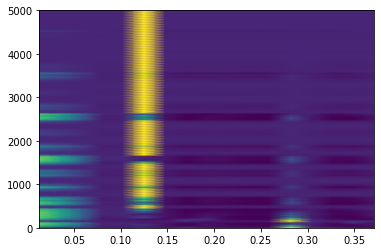

x ['LU_172.txt' '11177_1' 45442766 ... 0.553544 0.55358 0.553625]


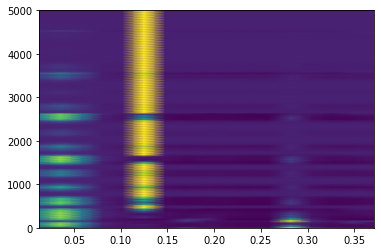

x ['LU_172.txt' '11177_2' 45442766 ... 0.550634 0.55067 0.550717]


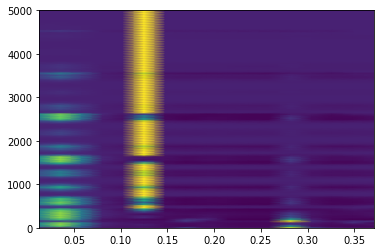

x ['LU_172.txt' '11178_1' 45462760 ... 0.508505 0.508564 0.50864]


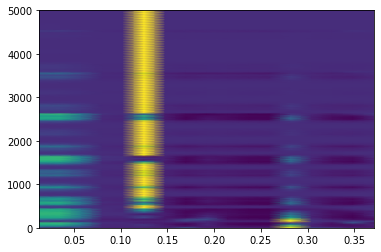

x ['LU_172.txt' '11178_2' 45462760 ... 0.505922 0.505965 0.506019]


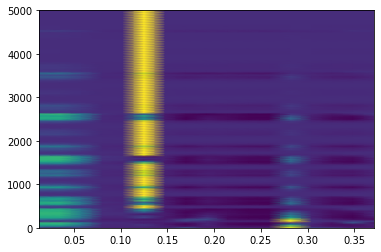

x ['LU_172.txt' '11179_1' 45562730 ... 0.586702 0.586724 0.58675]


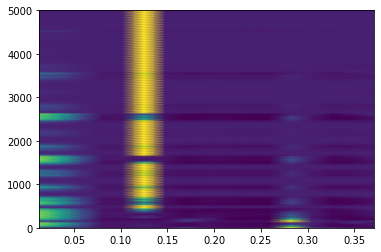

x ['LU_172.txt' '11179_2' 45562730 ... 0.588766 0.58879 0.588814]


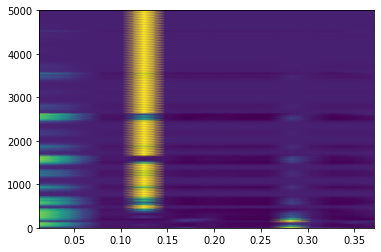

x ['LU_172.txt' '11184_1' 45562754 ... 0.449459 0.449511 0.449576]


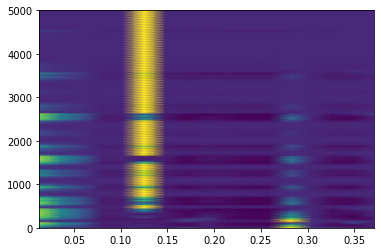

x ['LU_172.txt' '11184_2' 45562754 ... 0.447367 0.447435 0.44752]


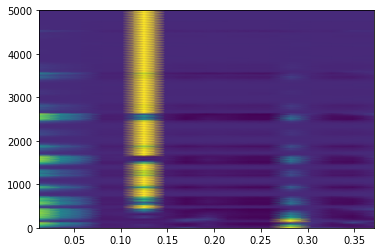

x ['LU_172.txt' '11186_1' 46822808 ... 0.538681 0.538743 0.538821]


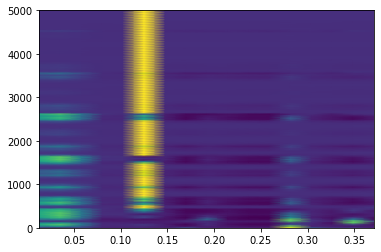

x ['LU_172.txt' '11186_2' 46822808 ... 0.536343 0.536433 0.536551]


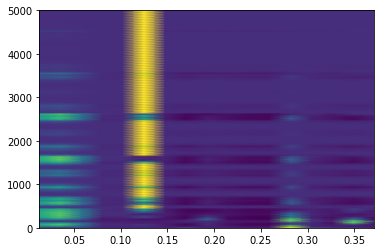

x ['LU_172.txt' '11187_1' 47002806 ... 0.557417 0.55744 0.557466]


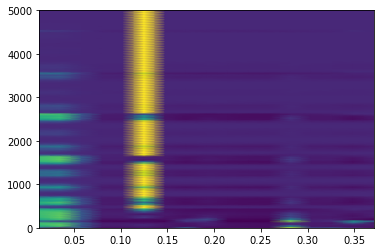

x ['LU_172.txt' '11187_2' 47002806 ... 0.556105 0.556126 0.556148]


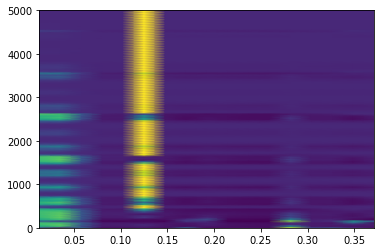

x ['LU_172.txt' '11189_1' 46722822 ... 0.562957 0.563016 0.563089]


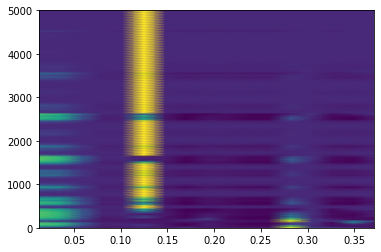

x ['LU_172.txt' '11189_2' 46722822 ... 0.55831 0.558384 0.558478]


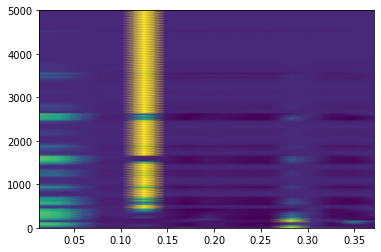

x ['LU_172.txt' '11190_1' 47802696 ... 0.593755 0.593811 0.593887]


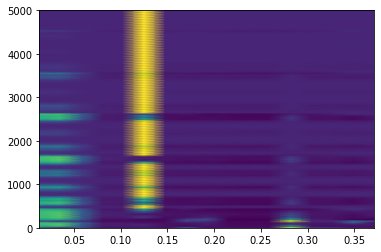

x ['LU_172.txt' '11190_2' 47802696 ... 0.590439 0.590479 0.59053]


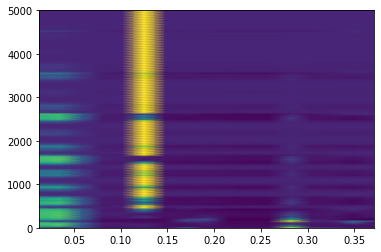

x ['LU_172.txt' '11191_1' 47682690 ... 0.457823 0.457823 0.457819]


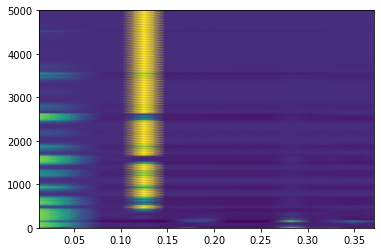

x ['LU_172.txt' '11191_2' 47682690 ... 0.453934 0.453937 0.453936]


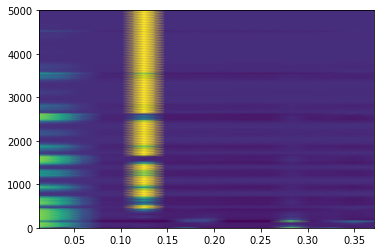

x ['LU_172.txt' '11192_1' 46922800 ... 0.493048 0.493083 0.493126]


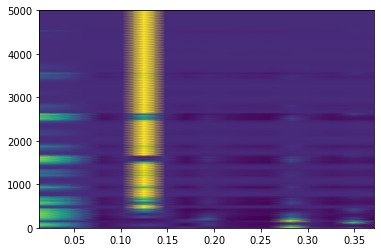

x ['LU_172.txt' '11192_2' 46922800 ... 0.489733 0.489785 0.48985]


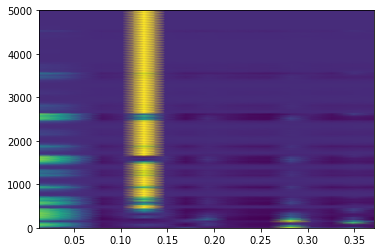

x ['LU_172.txt' '11193_1' 47742710 ... 0.624533 0.624594 0.624674]


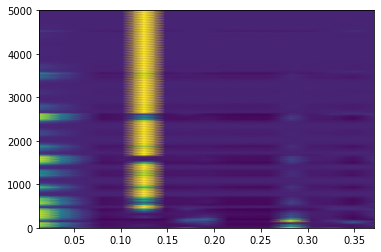

x ['LU_172.txt' '11193_2' 47742710 ... 0.619453 0.619509 0.619576]


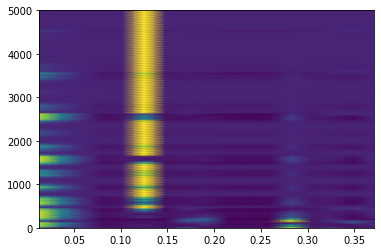

x ['LU_172.txt' '11194_1' 46522836 ... 0.697838 0.697952 0.6981]


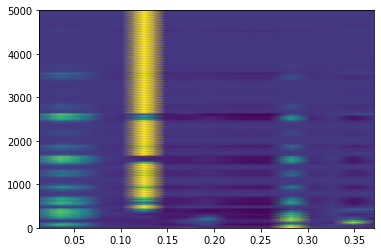

x ['LU_172.txt' '11194_2' 46522836 ... 0.693042 0.693157 0.693307]


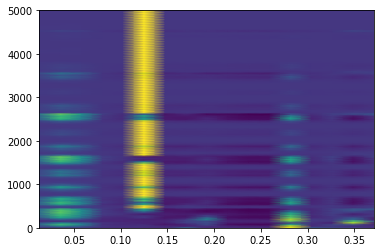

x ['LU_172.txt' '11195_1' 47722698 ... 0.527596 0.527612 0.527633]


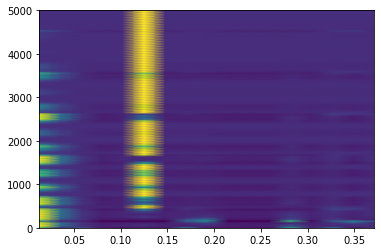

x ['LU_172.txt' '11195_2' 47722698 ... 0.524947 0.52497 0.524998]


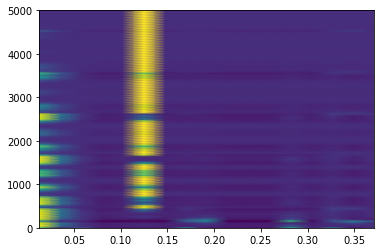

x ['LU_172.txt' '11198_1' 47862672 ... 0.56005 0.56007 0.560093]


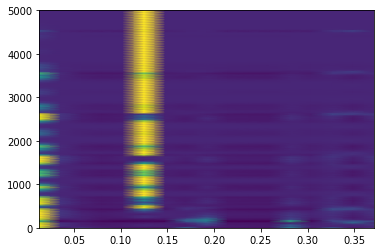

x ['LU_172.txt' '11198_2' 47862672 ... 0.556679 0.556723 0.556782]


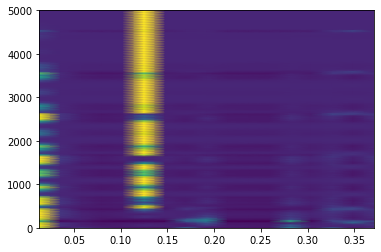

x ['LU_172.txt' '11199_1' 47742674 ... 0.521937 0.521964 0.521999]


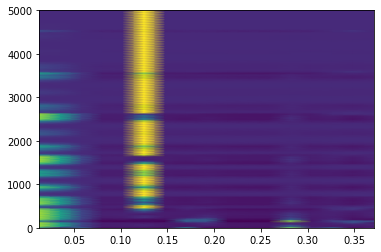

x ['LU_172.txt' '11199_2' 47742674 ... 0.517026 0.517036 0.517048]


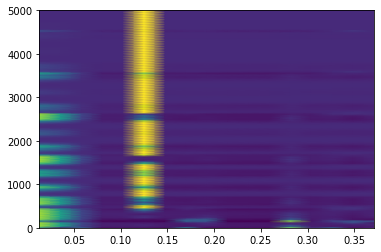

x ['LU_173.txt' '11200_1' 47662698 ... 0.56954 0.569629 0.569741]


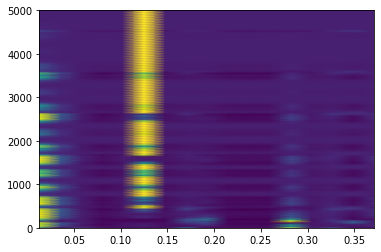

x ['LU_173.txt' '11200_2' 47662698 ... 0.569408 0.569504 0.569628]


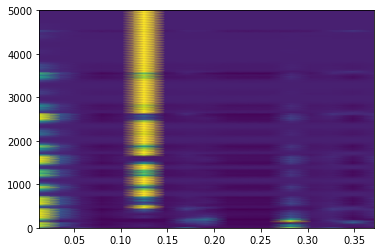

x ['LU_173.txt' '11202_1' 46902810 ... 0.484975 0.48503 0.485099]


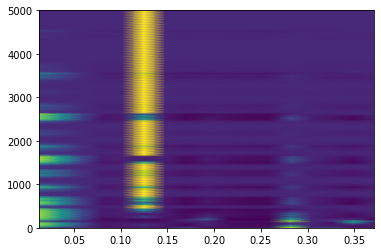

x ['LU_173.txt' '11202_2' 46902810 ... 0.483203 0.483263 0.483339]


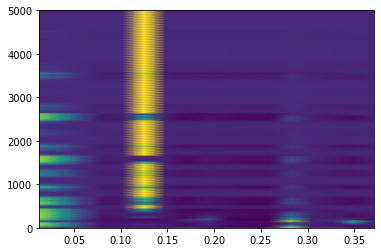

x ['LU_173.txt' '11203_1' 46862842 ... 0.493514 0.493575 0.493651]


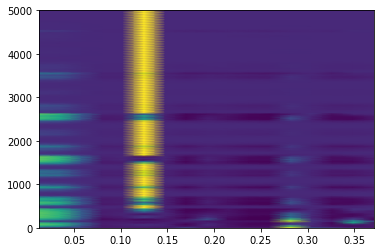

x ['LU_173.txt' '11203_2' 46862842 ... 0.489159 0.489228 0.489316]


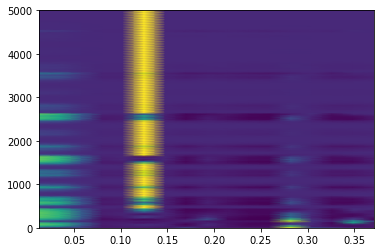

x ['LU_173.txt' '11205_1' 47622700 ... 0.474098 0.474125 0.474155]


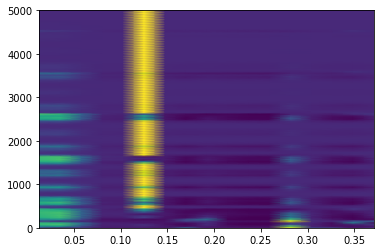

x ['LU_173.txt' '11205_2' 47622700 ... 0.470204 0.470255 0.470324]


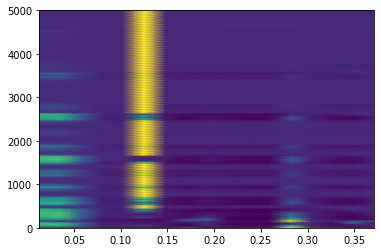

x ['LU_173.txt' '11206_1' 47842688 ... 0.525181 0.525239 0.525315]


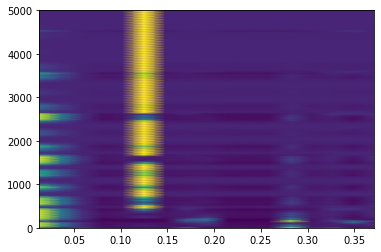

x ['LU_173.txt' '11206_2' 47842688 ... 0.518313 0.518361 0.518422]


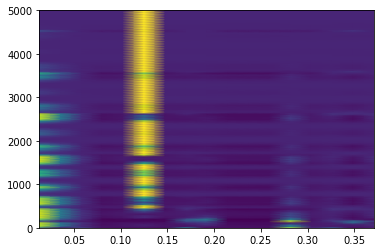

In [141]:
data = pd.read_csv('LUCAS2015_Soil_Spectra_EU28\spectra_ AT .csv')
print(data.head())
# spectral_indices = data.columns.str.contains('spc.')
# print(spectral_indices)

for index in range(1, 90):
    spectral_line = data.loc[index]
    #spectral_line = data.loc[index, spectral_indices]
    x = spectral_line.values
    print("x", x)
    reflectance = 10**(-x[5:]) #1. reflection maken want we hebben absorbance
    
    reflectance = reflectance[200:4100:1] #3. Edge trimming and 4. every tenth measurement
    r = savgol_filter(reflectance, 11, 2) #2. Savitzky and Golay filter
    
    f, t, Sxx = signal.spectrogram(r, 10e3)
    SXX_SDV = np.array([[ (Sxx[i][j] - np.mean(Sxx[i]) ) / np.std(Sxx[i]) for j in range(Sxx.shape[1])] for i in range(Sxx.shape[0])])
    
    
    plt.pcolormesh(t, f, SXX_SDV, shading='gouraud') #?5. Applying a standard normalition
    plt.show()


In [ ]:
#BE

In [143]:
Bedf = pd.read_csv (r'LUCAS2015_Soil_Spectra_EU28\spectra_ BE .csv')
print (Bedf)

            source SampleID   PointID NUTS_0  SampleN       400     400.5  \
0        LU_56.txt  12059_1  40603048     BE    12059  0.933545  0.941679   
1        LU_56.txt  12059_2  40603048     BE    12059  0.916576  0.924644   
2        LU_56.txt  12063_1  40423056     BE    12063  0.861728  0.870357   
3        LU_56.txt  12063_2  40423056     BE    12063  0.855859  0.864457   
4        LU_56.txt  12071_1  40123032     BE    12071  0.853256  0.860660   
..             ...      ...       ...    ...      ...       ...       ...   
285    LU_G3_7.txt  12157_2  39443132     BE    12157  0.774460  0.781679   
286    LU_G3_7.txt  12200_1  39023088     BE    12200  0.701642  0.710585   
287    LU_G3_7.txt  12200_2  39023088     BE    12200  0.703294  0.712221   
288  LU_G4_209.txt  12026_1  38183132     BE    12026  0.672101  0.677513   
289  LU_G4_209.txt  12026_2  38183132     BE    12026  0.670209  0.675586   

          401     401.5       402  ...      2495    2495.5      2496  \
0  

In [142]:
Topdf = pd.read_csv (r'LUCAS_Topsoil_2015_20200323.csv')
print (Topdf)

       Point_ID Revisited_point  Coarse  Clay  Sand  Silt  pH(CaCl2)  pH(H2O)  \
0      34103754              No     NaN   NaN   NaN   NaN        3.9     3.91   
1      34443774              No     NaN   NaN   NaN   NaN        3.1     3.91   
2      35163814              No     NaN   NaN   NaN   NaN        4.9     5.48   
3      32323656              No     NaN   NaN   NaN   NaN        3.0     3.76   
4      34463934              No    28.0  10.0  46.0  44.0        3.9     4.04   
...         ...             ...     ...   ...   ...   ...        ...      ...   
21854  45402772             Yes     NaN   NaN   NaN   NaN        6.9     7.03   
21855  47722672             Yes     NaN   NaN   NaN   NaN        5.7     5.98   
21856  45882618             Yes     NaN   NaN   NaN   NaN        6.8     6.99   
21857  45342706             Yes     NaN   NaN   NaN   NaN        6.0     6.12   
21858  47742660             Yes     NaN   NaN   NaN   NaN        4.2     4.68   

          EC     OC  ...  E

In [ ]:
pd.concat([Topdf['Point_ID'], Bedf['SampleID']], axis=1, keys=['df1', 'df2'])